In [4]:
import pandas as pd

# Use read_excel since you're loading .xlsx files
global_df = pd.read_excel('/Users/justinpizzoferrato/Downloads/all-weeks-global-netflix.xlsx')
country_df = pd.read_excel('/Users/justinpizzoferrato/Downloads/all-weeks-countries-netflix.xlsx')
popular_df = pd.read_excel('/Users/justinpizzoferrato/Downloads/most-popular-netflix.xlsx')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
!pip install openpyxl

In [8]:
print(global_df.shape, country_df.shape, popular_df.shape)
print(global_df.columns)
print(country_df.columns)
print(popular_df.columns)

(5840, 11) (272260, 8) (40, 7)
Index(['week', 'category', 'weekly_rank', 'show_title', 'season_title',
       'weekly_hours_viewed', 'runtime', 'weekly_views',
       'cumulative_weeks_in_top_10', 'is_staggered_launch',
       'episode_launch_details'],
      dtype='object')
Index(['country_name', 'country_iso2', 'week', 'category', 'weekly_rank',
       'show_title', 'season_title', 'cumulative_weeks_in_top_10'],
      dtype='object')
Index(['category', 'rank', 'show_title', 'season_title',
       'hours_viewed_first_91_days', 'runtime', 'views_first_91_days'],
      dtype='object')


In [10]:
display(global_df.head())
display(country_df.head())
display(popular_df.head())

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2024-04-14,Films (English),1,What Jennifer Did,NaN,26100000,1.4500,18000000.0,1,False,NaN
1,2024-04-14,Films (English),2,Woody Woodpecker Goes to Camp,NaN,19600000,1.6667,11800000.0,1,False,NaN
2,2024-04-14,Films (English),3,Scoop,NaN,14600000,1.7167,8500000.0,2,False,NaN
3,2024-04-14,Films (English),4,Glass,NaN,11000000,2.1500,5100000.0,2,False,NaN
4,2024-04-14,Films (English),5,Megan Leavey,NaN,9700000,1.9333,5000000.0,1,False,NaN


,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2024-04-14,Films,1,The Tearsmith,NaN,2
1,Argentina,AR,2024-04-14,Films,2,Stolen,NaN,1
2,Argentina,AR,2024-04-14,Films,3,"Love, Divided",NaN,1
3,Argentina,AR,2024-04-14,Films,4,Woody Woodpecker Goes to Camp,NaN,1
4,Argentina,AR,2024-04-14,Films,5,Rest In Peace,NaN,3


,category,rank,show_title,season_title,hours_viewed_first_91_days,runtime,views_first_91_days
0,Films (English),1,Red Notice,NaN,454200000,1.9667,230900000
1,Films (English),2,Don't Look Up,NaN,408600000,2.3833,171400000
2,Films (English),3,The Adam Project,NaN,281000000,1.7833,157600000
3,Films (English),4,Bird Box,NaN,325300000,2.0667,157400000
4,Films (English),5,Leave the World Behind,NaN,339300000,2.3667,143400000


In [12]:
print(global_df.isnull().sum())
print(country_df.isnull().sum())
print(popular_df.isnull().sum())

week                             0
category                         0
weekly_rank                      0
show_title                       0
season_title                  3026
weekly_hours_viewed              0
runtime                       4080
weekly_views                  4080
cumulative_weeks_in_top_10       0
is_staggered_launch              0
episode_launch_details        5768
dtype: int64
country_name                       0
country_iso2                       0
week                               0
category                           0
weekly_rank                        0
show_title                         0
season_title                  140675
cumulative_weeks_in_top_10         0
dtype: int64
category                       0
rank                           0
show_title                     0
season_title                  20
hours_viewed_first_91_days     0
runtime                        0
views_first_91_days            0
dtype: int64


In [16]:
# Unique title counts using the correct column name
print(global_df['show_title'].nunique())
print(country_df['show_title'].nunique())
print(popular_df['show_title'].nunique())

1915
7146
35


In [40]:
# Optional: Lowercase and strip all column names (globally)
global_df.columns = global_df.columns.str.strip().str.lower()
country_df.columns = country_df.columns.str.strip().str.lower()
popular_df.columns = popular_df.columns.str.strip().str.lower()

In [42]:
# Merge on show title
merged_df = pd.merge(global_df.groupby('show_title')['weekly_views'].sum().reset_index(),
                     popular_df[['show_title', 'views_first_91_days']],
                     on='show_title', how='inner')

In [44]:
# Top 10 globally by total views
global_top_views = global_df.groupby('show_title')['weekly_views'].sum().sort_values(ascending=False).head(10)
print(global_top_views)

show_title
Leave the World Behind         128800000.0
Extraction 2                   123300000.0
Damsel                         120800000.0
Leo                            111400000.0
Lift                            98900000.0
Society of the Snow             96800000.0
Heart of Stone                  91900000.0
Fool Me Once                    91800000.0
Nowhere                         86500000.0
The Super Mario Bros. Movie     75000000.0
Name: weekly_views, dtype: float64


In [46]:
print(country_df.columns)

Index(['country_name', 'country_iso2', 'week', 'category', 'weekly_rank',
       'show_title', 'season_title', 'cumulative_weeks_in_top_10'],
      dtype='object')


In [48]:
for country in ['United States', 'Argentina', 'India']:
    top_country = country_df[country_df['country_name'] == country]
    top_titles = top_country.groupby('show_title')['weekly_rank'].mean().sort_values().head(5)
    print(f"\nTop Shows in {country} by Avg Rank:\n", top_titles)


Top Shows in United States by Avg Rank:
 show_title
Unlocked: A Jail Experiment    1.0
The Call                       1.0
We Have a Ghost                1.0
365 Days: This Day             1.0
Mea Culpa                      1.0
Name: weekly_rank, dtype: float64

Top Shows in Argentina by Avg Rank:
 show_title
SAS: Rise of the Black Swan    1.0
The Man from Toronto           1.0
Lou                            1.0
Fatale                         1.0
Alpha                          1.0
Name: weekly_rank, dtype: float64

Top Shows in India by Avg Rank:
 show_title
Amar Singh Chamkila            1.000000
The Great Indian Kapil Show    1.000000
Fighter                        1.500000
Looop Lapeta                   1.666667
Maamla Legal Hai               1.714286
Name: weekly_rank, dtype: float64


In [50]:
for country in ['United States', 'Argentina', 'India']:
    top_country = country_df[country_df['country_name'] == country]
    top_titles = top_country['show_title'].value_counts().head(5)
    print(f"\nTop Shows in {country} by Weeks in Top 10:\n", top_titles)


Top Shows in United States by Weeks in Top 10:
 show_title
CoComelon          56
Stranger Things    46
Love Is Blind      34
Sing 2             32
Suits              28
Name: count, dtype: int64

Top Shows in Argentina by Weeks in Top 10:
 show_title
Pasión de Gavilanes        100
The Queen of Flow           42
Café con aroma de mujer     31
Yo soy Betty, la fea        31
Manifest                    30
Name: count, dtype: int64

Top Shows in India by Weeks in Top 10:
 show_title
Money Heist          98
Stranger Things      46
Manifest             37
The Good Doctor      32
Never Have I Ever    31
Name: count, dtype: int64


In [52]:
top_lifespans = global_df.groupby('show_title')['cumulative_weeks_in_top_10'].max().sort_values(ascending=False).head(10)
print(top_lifespans)

show_title
Yo soy Betty, la fea              30
Café con aroma de mujer           28
Manifest                          25
All Quiet on the Western Front    23
Squid Game                        22
Extraordinary Attorney Woo        21
Alchemy of Souls                  21
Wednesday                         20
Stranger Things                   19
Through My Window                 18
Name: cumulative_weeks_in_top_10, dtype: int64


In [54]:
runtime_impact = global_df.groupby('show_title').agg({
    'runtime': 'mean',
    'weekly_views': 'sum'
}).sort_values(by='weekly_views', ascending=False).head(10)

print(runtime_impact)

                             runtime  weekly_views
show_title                                        
Leave the World Behind        2.3667   128800000.0
Extraction 2                  2.0667   123300000.0
Damsel                        1.8333   120800000.0
Leo                           1.7833   111400000.0
Lift                          1.7833    98900000.0
Society of the Snow           2.4333    96800000.0
Heart of Stone                2.1000    91900000.0
Fool Me Once                  6.4167    91800000.0
Nowhere                       1.8167    86500000.0
The Super Mario Bros. Movie   1.5333    75000000.0


In [56]:
country_df.groupby(['country_name', 'category']).size().unstack().fillna(0)

category,Films,TV
country_name,,
Argentina,1460,1460
Australia,1460,1460
Austria,1460,1460
Bahamas,1460,1460
Bahrain,1460,1460
...,...,...
United Kingdom,1460,1460
United States,1460,1460
Uruguay,1460,1460


In [64]:
# Group and summarize
lifespan_vs_views = global_df.groupby('show_title')[['weekly_views', 'cumulative_weeks_in_top_10']].agg({
    'weekly_views': 'sum',
    'cumulative_weeks_in_top_10': 'max'
})

# Sort to see top 10
lifespan_vs_views_sorted = lifespan_vs_views.sort_values(by='weekly_views', ascending=False).head(10)

# Display
print(lifespan_vs_views_sorted)

                             weekly_views  cumulative_weeks_in_top_10
show_title                                                           
Leave the World Behind        128800000.0                           5
Extraction 2                  123300000.0                           7
Damsel                        120800000.0                           5
Leo                           111400000.0                          10
Lift                           98900000.0                           5
Society of the Snow            96800000.0                          12
Heart of Stone                 91900000.0                           5
Fool Me Once                   91800000.0                           8
Nowhere                        86500000.0                          15
The Super Mario Bros. Movie    75000000.0                          14


In [66]:
# Aggregate weekly views and average runtime
efficiency_df = global_df.groupby('show_title').agg({
    'weekly_views': 'sum',
    'runtime': 'mean'
})

# Calculate views per minute
efficiency_df['views_per_minute'] = efficiency_df['weekly_views'] / (efficiency_df['runtime'] * 60)

# Sort and display top 10
efficiency_df_sorted = efficiency_df.sort_values(by='views_per_minute', ascending=False).head(10)
print(efficiency_df_sorted)

                                                    weekly_views  runtime  \
show_title                                                                  
Suits                                                 10400000.0      0.0   
Regular Show                                           1600000.0      0.0   
Attack on Titan                                        1700000.0      0.0   
Behind Your Touch                                      6500000.0      0.0   
Welcome to Samdal-ri                                  13900000.0      0.0   
The Seven Deadly Sins: Four Knights of the Apoc...     3800000.0      0.0   
Money Heist                                            1500000.0      0.0   
The Good Bad Mother                                    1200000.0      0.0   
My Hero Academia                                       1500000.0      0.0   
Doctor Slump                                          18600000.0      0.0   

                                                    views_per_minute  
show

/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_33162/3510310912.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_views.values, y=top_views.index, palette='viridis')


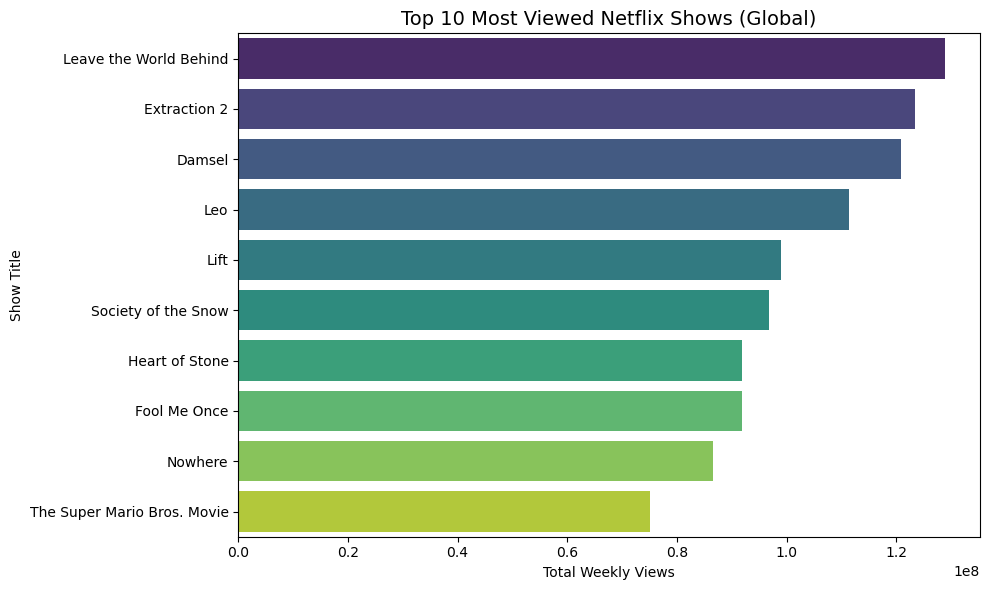

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
top_views = global_df.groupby('show_title')['weekly_views'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_views.values, y=top_views.index, palette='viridis')
plt.title('Top 10 Most Viewed Netflix Shows (Global)', fontsize=14)
plt.xlabel('Total Weekly Views')
plt.ylabel('Show Title')
plt.tight_layout()
plt.savefig('chart_top_views.png', dpi=300)
plt.show()

/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_33162/1387777883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lifespan.values, y=top_lifespan.index, palette='magma')


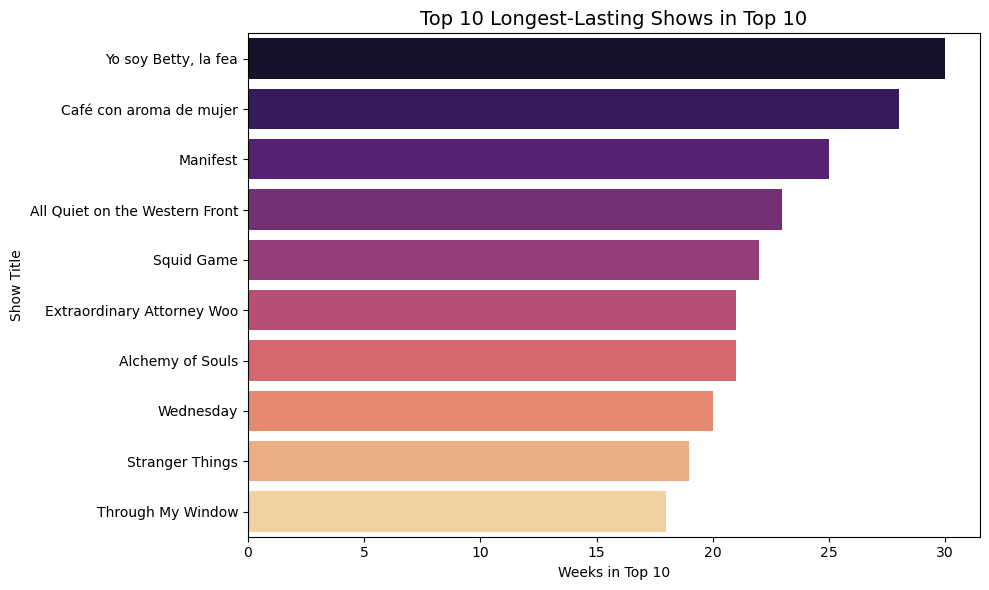

In [70]:
top_lifespan = global_df.groupby('show_title')['cumulative_weeks_in_top_10'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_lifespan.values, y=top_lifespan.index, palette='magma')
plt.title('Top 10 Longest-Lasting Shows in Top 10', fontsize=14)
plt.xlabel('Weeks in Top 10')
plt.ylabel('Show Title')
plt.tight_layout()
plt.savefig('chart_lifespan.png', dpi=300)
plt.show()

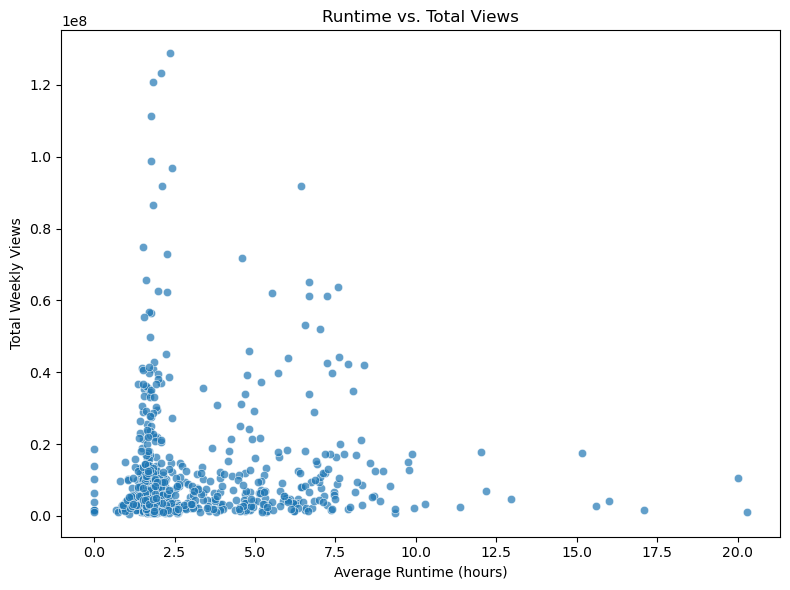

In [72]:
runtime_plot = global_df.groupby('show_title').agg({
    'weekly_views': 'sum',
    'runtime': 'mean'
}).dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=runtime_plot, x='runtime', y='weekly_views', alpha=0.7)
plt.title('Runtime vs. Total Views')
plt.xlabel('Average Runtime (hours)')
plt.ylabel('Total Weekly Views')
plt.tight_layout()
plt.savefig('chart_runtime_vs_views.png', dpi=300)
plt.show()

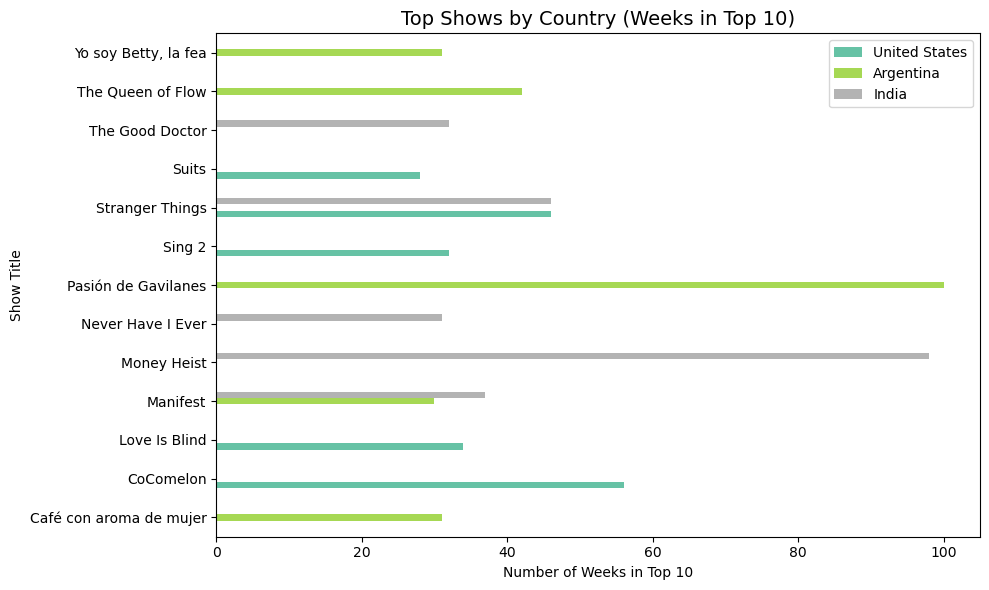

In [74]:
# Prepare data
country_df.columns = country_df.columns.str.strip().str.lower()
country_counts = {}

for country in ['United States', 'Argentina', 'India']:
    top_country = country_df[country_df['country_name'] == country]
    top_titles = top_country['show_title'].value_counts().head(5)
    country_counts[country] = top_titles

country_compare_df = pd.DataFrame(country_counts).fillna(0)

# Plot
country_compare_df.plot(kind='barh', figsize=(10, 6), colormap='Set2')
plt.title('Top Shows by Country (Weeks in Top 10)', fontsize=14)
plt.xlabel('Number of Weeks in Top 10')
plt.ylabel('Show Title')
plt.tight_layout()
plt.savefig('chart_country_comparison.png', dpi=300)
plt.show()

/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_33162/1396299904.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=efficiency_df_sorted['views_per_minute'], y=efficiency_df_sorted.index, palette='cubehelix')


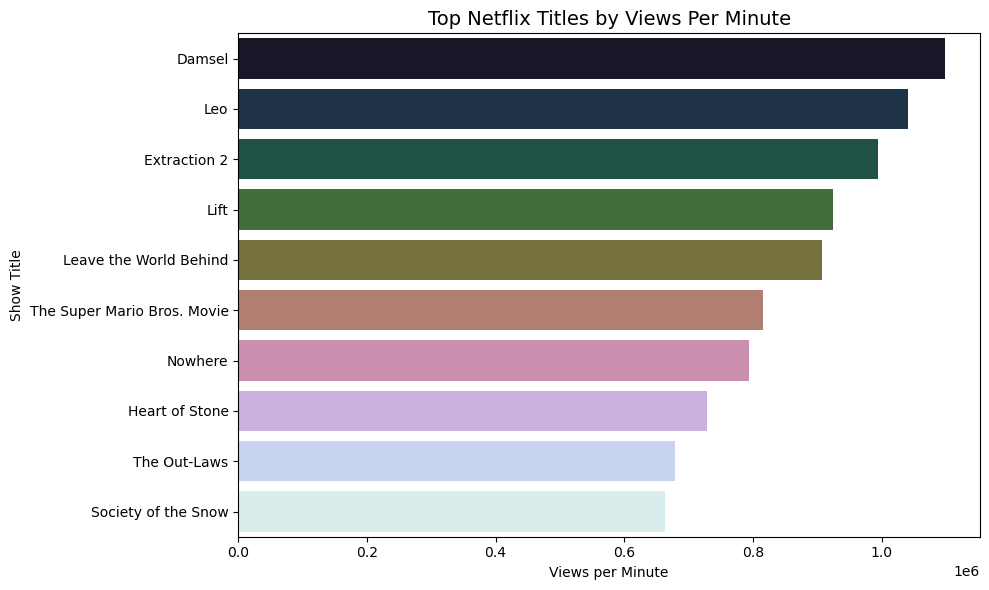

In [76]:
efficiency_df = global_df.groupby('show_title').agg({
    'weekly_views': 'sum',
    'runtime': 'mean'
}).query('runtime > 0')  # Filter out runtime=0

efficiency_df['views_per_minute'] = efficiency_df['weekly_views'] / (efficiency_df['runtime'] * 60)
efficiency_df_sorted = efficiency_df.sort_values(by='views_per_minute', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=efficiency_df_sorted['views_per_minute'], y=efficiency_df_sorted.index, palette='cubehelix')
plt.title('Top Netflix Titles by Views Per Minute', fontsize=14)
plt.xlabel('Views per Minute')
plt.ylabel('Show Title')
plt.tight_layout()
plt.savefig('chart_views_per_minute.png', dpi=300)
plt.show()

In [82]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 60.2 MB/s eta 0:00:0000:0100:01


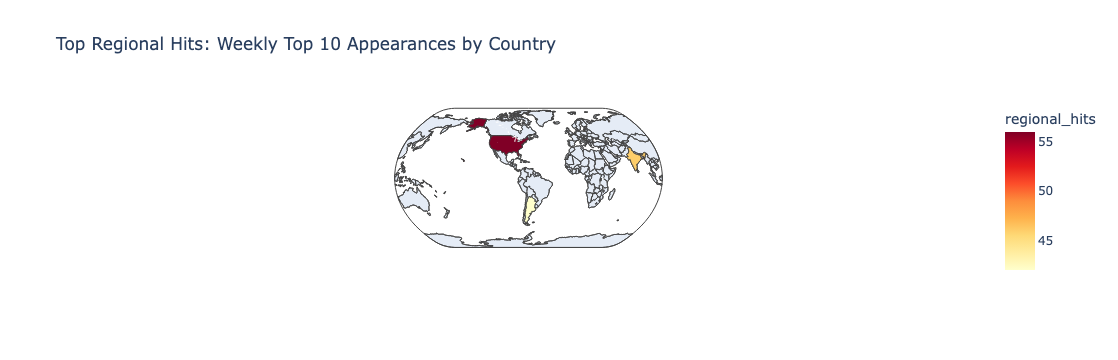

In [102]:
import plotly.express as px
import pandas as pd

regional_data = {
    'country': ['United States', 'Argentina', 'India'],
    'regional_hits': [56, 42, 46]
}
df_map = pd.DataFrame(regional_data)

fig = px.choropleth(
    df_map,
    locations='country',
    locationmode='country names',
    color='regional_hits',
    color_continuous_scale='YlOrRd',
    title='Top Regional Hits: Weekly Top 10 Appearances by Country'
)

fig.update_geos(
    showcountries=True,
    projection_type="natural earth",
    lataxis_range=[-60, 70],
    lonaxis_range=[-170, 160]
)

fig.update_traces(
    hovertemplate='<b>%{location}</b><br>Appearances: %{z}<extra></extra>'
)

fig.show()

In [80]:
plt.savefig('filename.png', dpi=300, bbox_inches='tight', facecolor='white')

<Figure size 640x480 with 0 Axes>

In [104]:
top_global = ['Leave the World Behind', 'Extraction 2', 'Damsel']

In [106]:
regional_hit_counts = (
    country_df[country_df['show_title'].isin(top_global)]
    .groupby('country_name')['show_title']
    .count()
    .reset_index()
    .rename(columns={'show_title': 'global_hit_appearances'})
)

In [108]:
regional_hit_counts['country'] = regional_hit_counts['country_name']  # or match ISO2

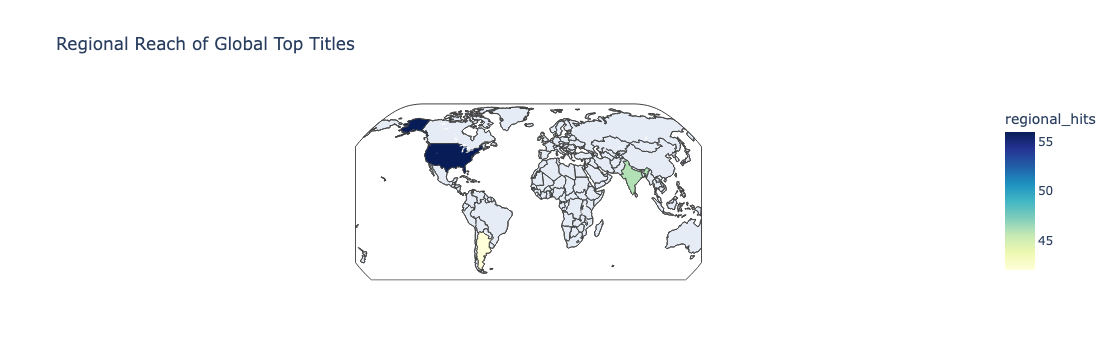

In [114]:
import plotly.express as px
import pandas as pd

# Data
regional_data = {
    'country': ['United States', 'Argentina', 'India'],
    'regional_hits': [56, 42, 46]
}
df_map = pd.DataFrame(regional_data)

# Plot
fig = px.choropleth(
    df_map,
    locations='country',
    locationmode='country names',
    color='regional_hits',
    color_continuous_scale='YlGnBu',
    title='Regional Reach of Global Top Titles'
)

fig.update_geos(
    showcountries=True,
    projection_type="natural earth"
)

fig.update_traces(
    hovertemplate='<b>%{location}</b><br>Appearances: %{z}<extra></extra>'
)

# Show (use Plotly UI to export)
fig.show()

In [26]:
print(country_df.columns)

Index(['country_name', 'country_iso2', 'week', 'category', 'weekly_rank',
       'show_title', 'season_title', 'cumulative_weeks_in_top_10'],
      dtype='object')


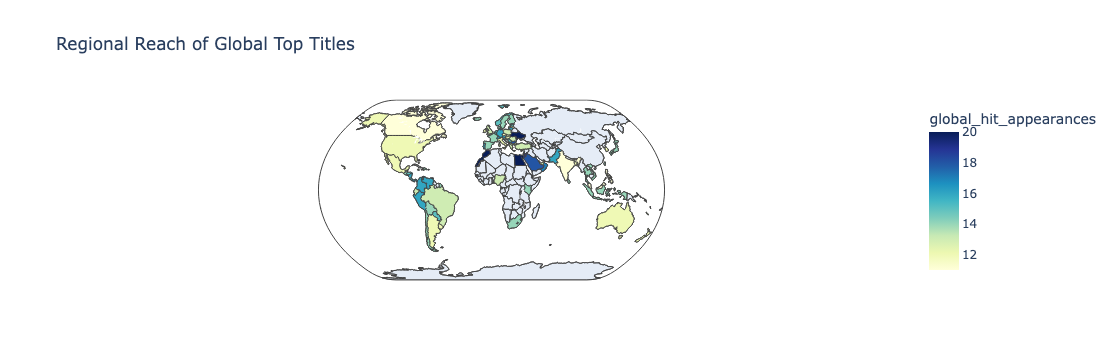

In [116]:
import plotly.express as px

fig = px.choropleth(
    regional_hit_counts,
    locations='country',
    locationmode='country names',
    color='global_hit_appearances',
    color_continuous_scale='YlGnBu',
    title='Regional Reach of Global Top Titles'
)

fig.update_geos(showcountries=True, projection_type="natural earth")
fig.update_traces(hovertemplate='<b>%{location}</b><br>Appearances: %{z}<extra></extra>')
fig.show()

In [122]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 20.3 MB/s eta 0:00:00a 0:00:01


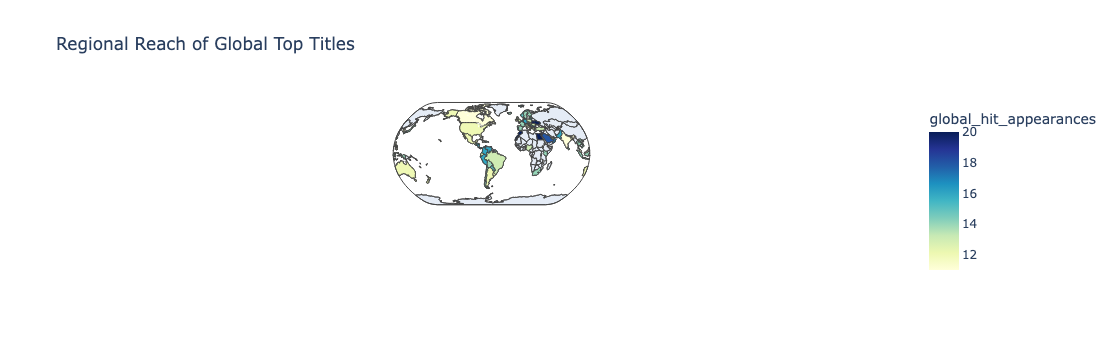

In [138]:
import plotly.express as px
import pandas as pd

# Compute how often global top shows appear in each country's Top 10
regional_hit_counts = (
    country_df[country_df['show_title'].isin(['Leave the World Behind', 'Extraction 2', 'Damsel'])]
    .groupby('country_name')['show_title']
    .count()
    .reset_index()
    .rename(columns={'show_title': 'global_hit_appearances', 'country_name': 'country'})
)

# full dataset
fig = px.choropleth(
    regional_hit_counts,
    locations='country',
    locationmode='country names',
    color='global_hit_appearances',
    color_continuous_scale='YlGnBu',
    title='Regional Reach of Global Top Titles'
)

fig.update_geos(showcountries=True, projection_type='natural earth')
fig.update_traces(hovertemplate='<b>%{location}</b><br>Appearances: %{z}<extra></extra>')
fig.show()

In [146]:
!pip install -U kaleido

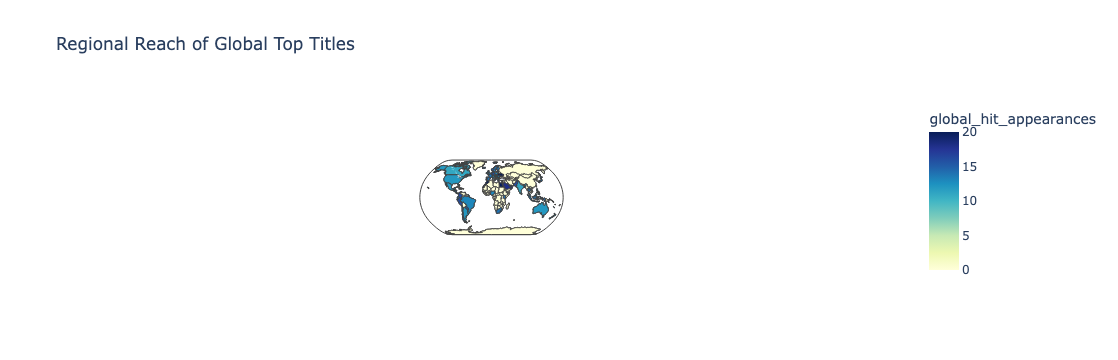

In [152]:
import plotly.express as px
import pandas as pd
import pycountry

# -------------------------------
# STEP 1: Generate initial data from country_df
# -------------------------------

# List of top global shows to track
top_global = ['Leave the World Behind', 'Extraction 2', 'Damsel']

# Count how often these shows appear in each country
regional_hit_counts = (
    country_df[country_df['show_title'].isin(top_global)]
    .groupby('country_name')['show_title']
    .count()
    .reset_index()
    .rename(columns={'show_title': 'global_hit_appearances', 'country_name': 'country'})
)

# -------------------------------
# STEP 2: Create full country list and merge
# -------------------------------

# Get list of all countries using pycountry
all_countries = [country.name for country in pycountry.countries]

# Create base DataFrame with all countries
regional_hit_counts_full = pd.DataFrame({'country': all_countries})

# Merge your actual data into full country list
regional_hit_counts_full = regional_hit_counts_full.merge(
    regional_hit_counts,
    on='country',
    how='left'
)

# Fill missing values with 0
regional_hit_counts_full['global_hit_appearances'] = regional_hit_counts_full['global_hit_appearances'].fillna(0)

# -------------------------------
# STEP 3: Plot the full world map
# -------------------------------

fig = px.choropleth(
    regional_hit_counts_full,
    locations='country',
    locationmode='country names',
    color='global_hit_appearances',
    color_continuous_scale='YlGnBu',
    title='Regional Reach of Global Top Titles',
    range_color=(0, regional_hit_counts['global_hit_appearances'].max())  # consistent scale
)

fig.update_geos(showcountries=True, projection_type='natural earth')

fig.update_traces(
    hovertemplate='<b>%{location}</b><br>Appearances: %{z}<extra></extra>'
)

import plotly.io as pio

fig.show()

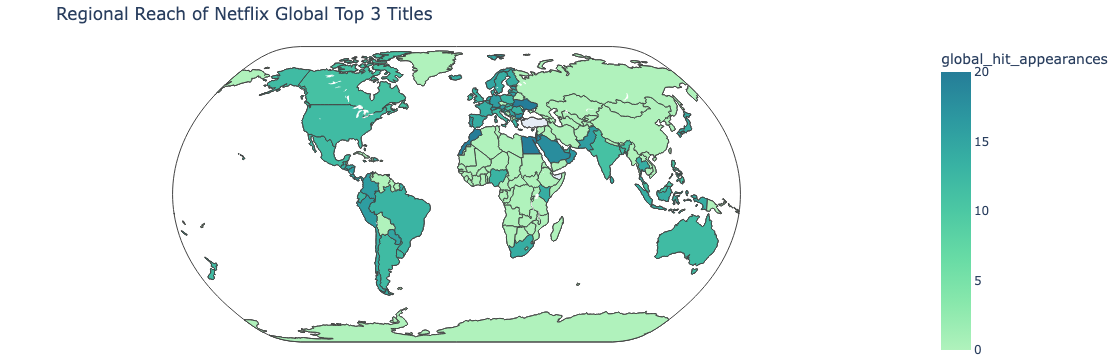

In [154]:
import plotly.express as px
import pandas as pd
import pycountry

# Step 1: Set top titles to track
top_global = ['Leave the World Behind', 'Extraction 2', 'Damsel']

# Step 2: Count how often they appear in each country
regional_hit_counts = (
    country_df[country_df['show_title'].isin(top_global)]
    .groupby('country_name')['show_title']
    .count()
    .reset_index()
    .rename(columns={'show_title': 'global_hit_appearances', 'country_name': 'country'})
)

# Step 3: Fill in missing countries
all_countries = [country.name for country in pycountry.countries]
regional_hit_counts_full = pd.DataFrame({'country': all_countries})
regional_hit_counts_full = regional_hit_counts_full.merge(regional_hit_counts, on='country', how='left')
regional_hit_counts_full['global_hit_appearances'] = regional_hit_counts_full['global_hit_appearances'].fillna(0)

# Step 4: Create map
fig = px.choropleth(
    regional_hit_counts_full,
    locations='country',
    locationmode='country names',
    color='global_hit_appearances',
    color_continuous_scale='Tealgrn',
    range_color=[0, regional_hit_counts_full['global_hit_appearances'].max()],
    title='Regional Reach of Netflix Global Top 3 Titles'
)
fig.update_geos(showcountries=True, projection_type="natural earth")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})

fig.show()

In [156]:
import plotly.io as pio
pio.write_image(fig, 'global_top3_reach.png', width=1600, height=900, scale=2)

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


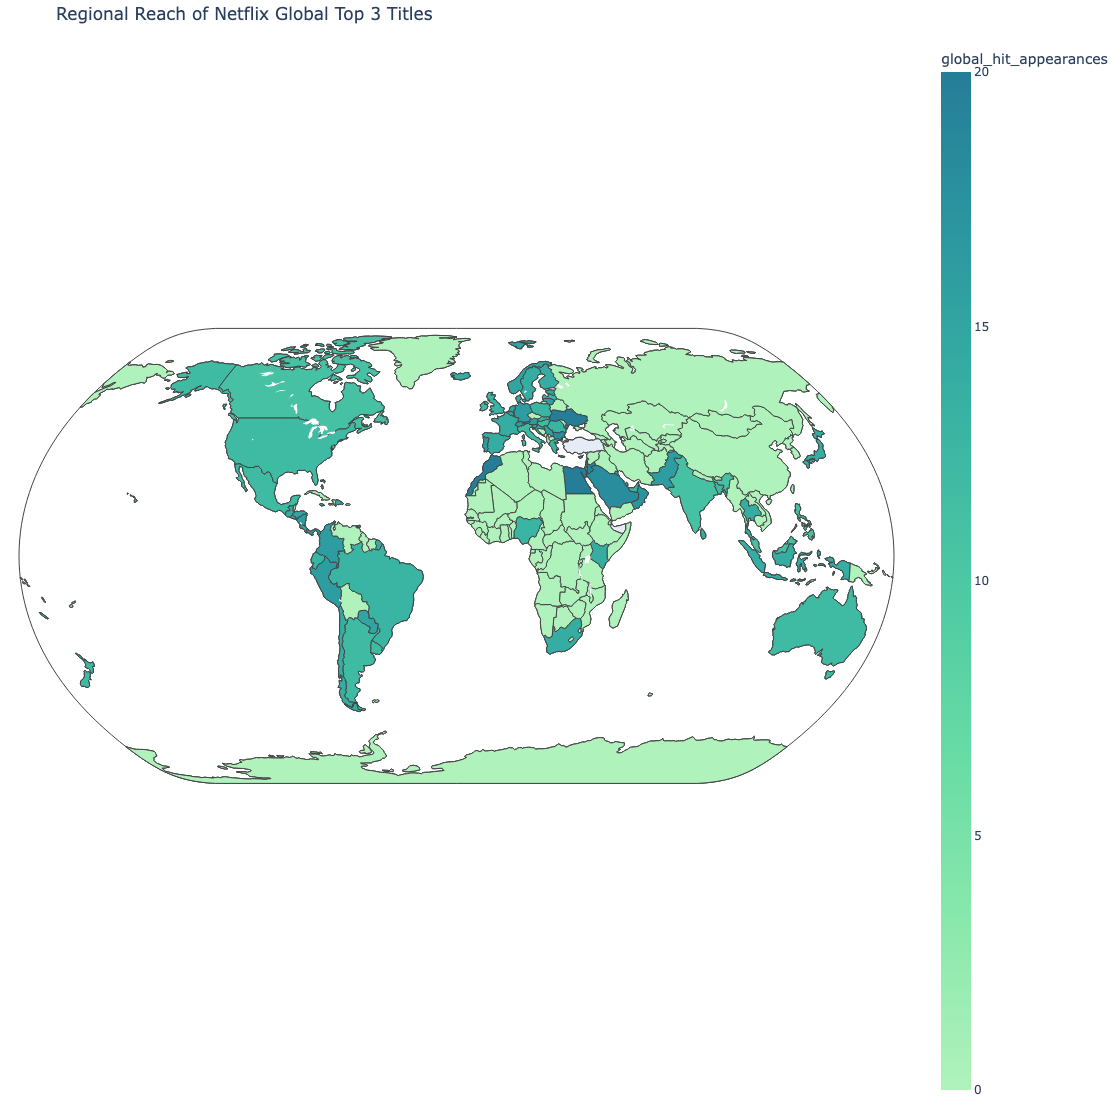

In [158]:
import plotly.express as px
import plotly.io as pio
import pandas as pd
import pycountry

# --- Step 1: Generate base data ---

# Define top 3 titles
top_global = ['Leave the World Behind', 'Extraction 2', 'Damsel']

# Count appearances in top 10 lists
regional_hit_counts = (
    country_df[country_df['show_title'].isin(top_global)]
    .groupby('country_name')['show_title']
    .count()
    .reset_index()
    .rename(columns={'show_title': 'global_hit_appearances', 'country_name': 'country'})
)

# --- Step 2: Add missing countries with 0s ---

# Get all country names using pycountry
all_countries = [country.name for country in pycountry.countries]

# Create full dataset
regional_hit_counts_full = pd.DataFrame({'country': all_countries})
regional_hit_counts_full = regional_hit_counts_full.merge(
    regional_hit_counts, on='country', how='left'
)
regional_hit_counts_full['global_hit_appearances'] = regional_hit_counts_full['global_hit_appearances'].fillna(0)

# --- Step 3: Build choropleth map ---

fig = px.choropleth(
    regional_hit_counts_full,
    locations='country',
    locationmode='country names',
    color='global_hit_appearances',
    color_continuous_scale='Tealgrn',
    range_color=(0, regional_hit_counts_full['global_hit_appearances'].max()),
    title='Regional Reach of Netflix Global Top 3 Titles'
)

# Layout: taller and less wide
fig.update_layout(
    geo=dict(
        projection_type='natural earth',
        showcountries=True,
        lataxis=dict(range=[-60, 85]),
        lonaxis=dict(range=[-130, 150]),
    ),
    margin=dict(r=0, t=40, l=0, b=0),
    height=1100,
    width=800
)

fig.show()

# Optional: export
# pio.write_image(fig, 'global_top3_vertical_map.png', width=800, height=1100, scale=2)

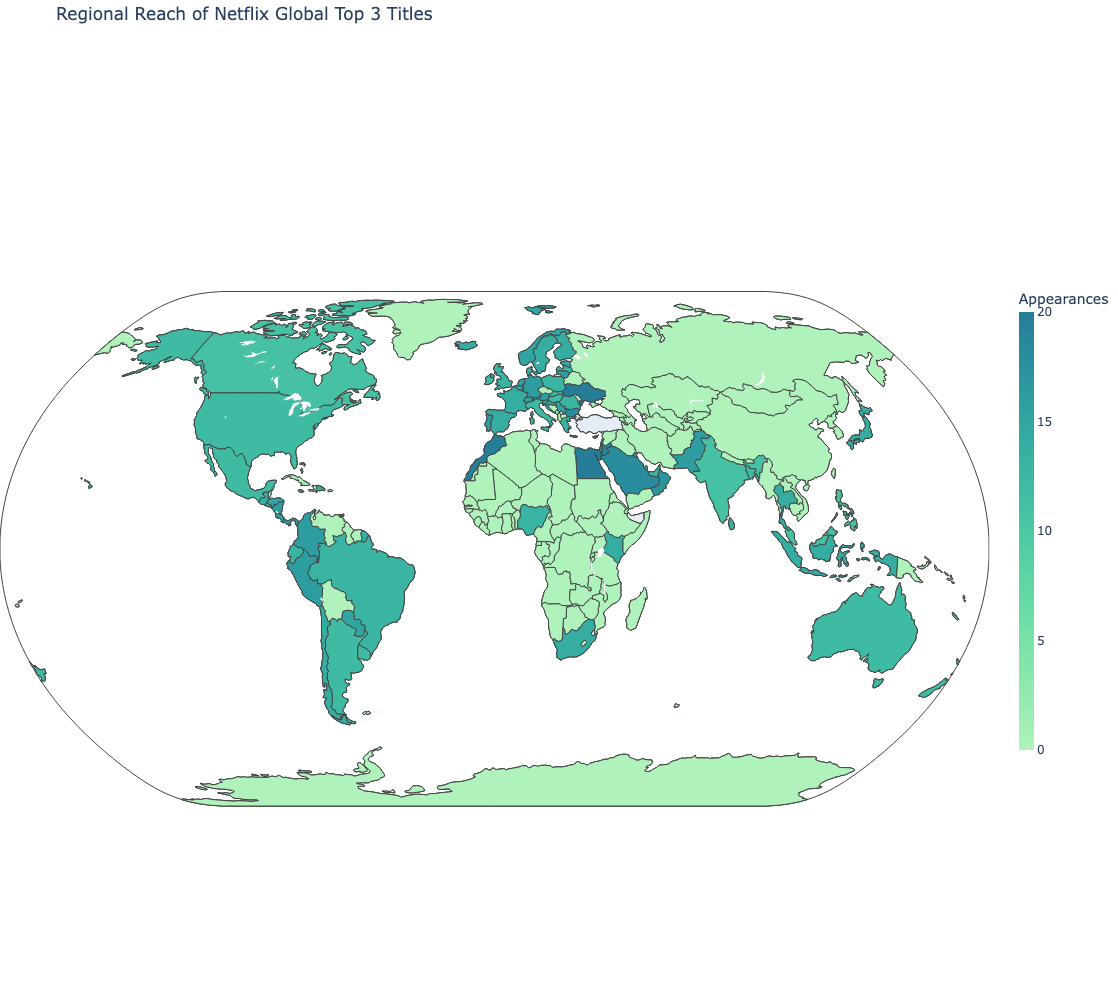

In [160]:
import plotly.express as px
import plotly.io as pio
import pandas as pd
import pycountry

# Step 1: Top global titles
top_global = ['Leave the World Behind', 'Extraction 2', 'Damsel']

# Step 2: Aggregate appearance counts
regional_hit_counts = (
    country_df[country_df['show_title'].isin(top_global)]
    .groupby('country_name')['show_title']
    .count()
    .reset_index()
    .rename(columns={'show_title': 'global_hit_appearances', 'country_name': 'country'})
)

# Step 3: Fill in missing countries
all_countries = [country.name for country in pycountry.countries]
regional_hit_counts_full = pd.DataFrame({'country': all_countries})
regional_hit_counts_full = regional_hit_counts_full.merge(
    regional_hit_counts, on='country', how='left'
)
regional_hit_counts_full['global_hit_appearances'] = regional_hit_counts_full['global_hit_appearances'].fillna(0)

# Step 4: Generate map
fig = px.choropleth(
    regional_hit_counts_full,
    locations='country',
    locationmode='country names',
    color='global_hit_appearances',
    color_continuous_scale='Tealgrn',
    range_color=(0, regional_hit_counts_full['global_hit_appearances'].max()),
    title='Regional Reach of Netflix Global Top 3 Titles'
)

# Step 5: Adjust projection, margins, and color bar height
fig.update_layout(
    geo=dict(
        projection_type='natural earth',
        showcountries=True,
        lataxis=dict(range=[-60, 85]),
        lonaxis=dict(range=[-130, 150])
    ),
    margin=dict(r=0, t=40, l=0, b=0),
    height=1000,
    width=800,
    coloraxis_colorbar=dict(
        len=0.5,              # Reduce height of color scale
        y=0.5,                # Center vertically
        thickness=15,         # Adjust thickness
        title='Appearances'
    )
)

fig.show()

In [162]:
import plotly.io as pio

# Export as PNG (adjust size/scale if needed)
pio.write_image(fig, "netflix_global_top3_map.png", format="png", width=800, height=1000, scale=2)

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


/var/folders/j6/pnmkkxb11ns3hdl7qxdhp2zc0000gn/T/ipykernel_33162/1547794478.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




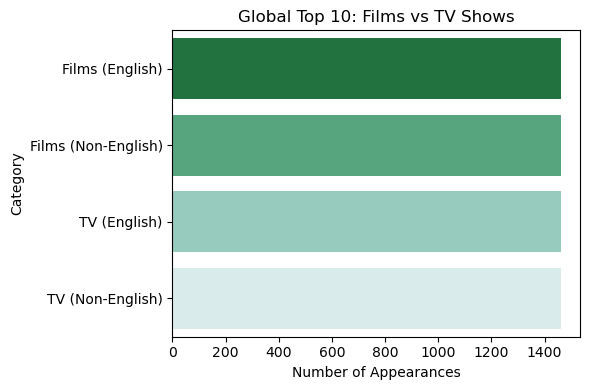

In [164]:
# Count global category appearances
category_counts = global_df['category'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='BuGn_r')
plt.title("Global Top 10: Films vs TV Shows")
plt.xlabel("Number of Appearances")
plt.ylabel("Category")
plt.tight_layout()
plt.savefig("category_breakdown.png", dpi=300)
plt.show()

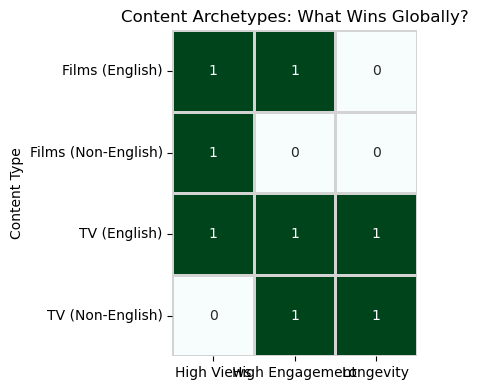

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create manually labeled performance table
data = {
    'Content Type': ['Films (English)', 'Films (Non-English)', 'TV (English)', 'TV (Non-English)'],
    'High Views': [1, 1, 1, 0],
    'High Engagement': [1, 0, 1, 1],
    'Longevity': [0, 0, 1, 1]
}

df = pd.DataFrame(data)
df = df.set_index('Content Type')

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap='BuGn', cbar=False, linewidths=1, linecolor='lightgrey', square=True)
plt.title("Content Archetypes: What Wins Globally?")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("content_archetypes.png", dpi=300)
plt.show()

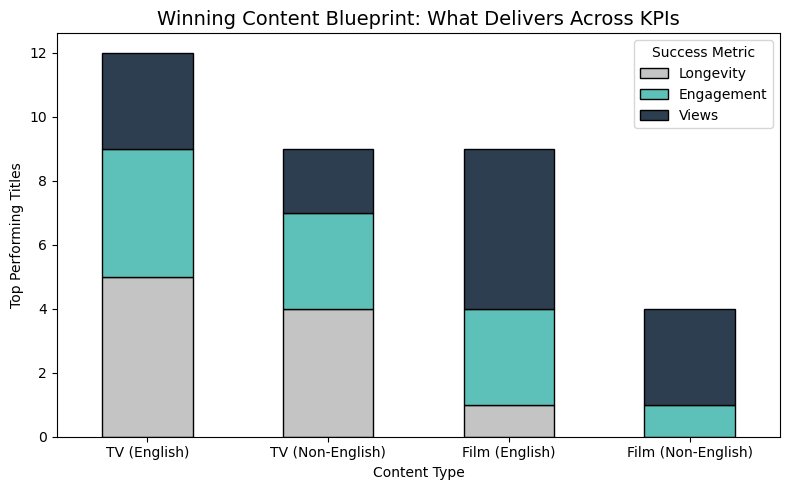

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample summary data for each group (values = count of titles meeting each KPI)
data = {
    'Category': ['TV (English)', 'TV (Non-English)', 'Film (English)', 'Film (Non-English)'],
    'Longevity': [5, 4, 1, 0],
    'Engagement': [4, 3, 3, 1],
    'Views': [3, 2, 5, 3]
}

df = pd.DataFrame(data)
df = df.set_index('Category')

# Plot as stacked bar chart
colors = ['#c4c4c4', '#5dc1b9', '#2c3e50']
df.plot(kind='bar', stacked=True, figsize=(8, 5), color=colors, edgecolor='black')

plt.title('Winning Content Blueprint: What Delivers Across KPIs', fontsize=14)
plt.ylabel('Top Performing Titles')
plt.xlabel('Content Type')
plt.xticks(rotation=0)
plt.legend(title='Success Metric', loc='upper right')
plt.tight_layout()
plt.savefig("winning_content_blueprint.png", dpi=300)
plt.show()

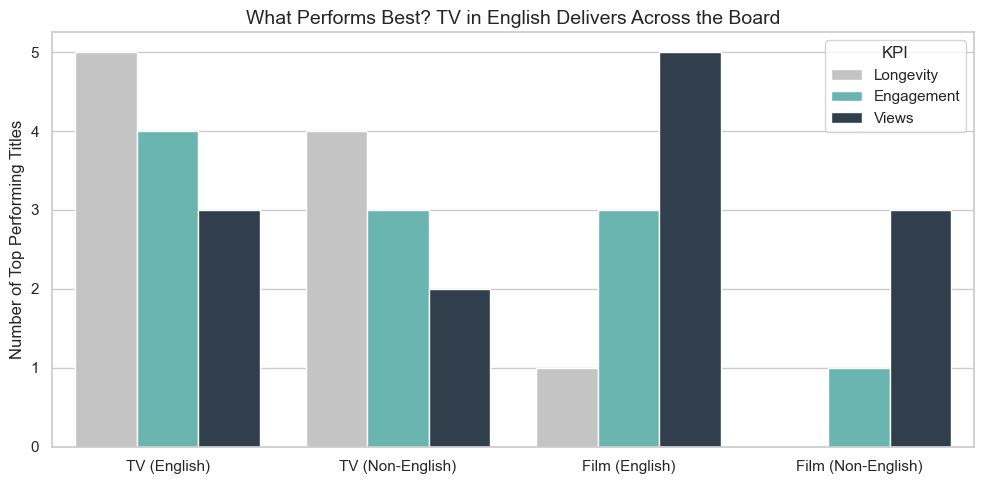

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data setup
data = {
    'Category': ['TV (English)', 'TV (Non-English)', 'Film (English)', 'Film (Non-English)'],
    'Longevity': [5, 4, 1, 0],
    'Engagement': [4, 3, 3, 1],
    'Views': [3, 2, 5, 3]
}

df = pd.DataFrame(data)
df = df.melt(id_vars='Category', var_name='Metric', value_name='Count')

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

# Grouped barplot
palette = {'Views': '#2c3e50', 'Engagement': '#5dc1b9', 'Longevity': '#c4c4c4'}
ax = sns.barplot(data=df, x='Category', y='Count', hue='Metric', palette=palette)

# Labels
plt.title('What Performs Best? TV in English Delivers Across the Board', fontsize=14)
plt.ylabel('Number of Top Performing Titles')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(title='KPI')
plt.tight_layout()

# Save
plt.savefig("tv_performance_comparison.png", dpi=300)
plt.show()